# AutoEncoders on Image Data

### The Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


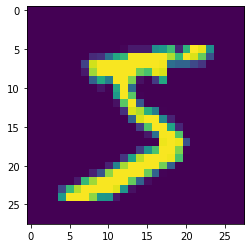

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
28*28

784

In [9]:
784/2

392.0

In [10]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400,activation='relu'))
encoder.add(Dense(units=200,activation='relu'))
encoder.add(Dense(units=100,activation='relu'))
encoder.add(Dense(units=50,activation='relu'))
encoder.add(Dense(units=25,activation='relu'))


In [11]:
decoder = Sequential()

decoder.add(Dense(units=50,activation='relu',input_shape=[25]))
decoder.add(Dense(units=100,activation='relu'))
decoder.add(Dense(units=200,activation='relu'))
decoder.add(Dense(units=400,activation='relu'))
decoder.add(Dense(units=784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [12]:
autoencoder = Sequential([encoder,decoder])

In [13]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2470 - accuracy: 0.0961 - val_loss: 0.2123 - val_accuracy: 0.1271
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1880 - accuracy: 0.1586 - val_loss: 0.1696 - val_accuracy: 0.1791
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1618 - accuracy: 0.1934 - val_loss: 0.1562 - val_accuracy: 0.1944
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1495 - accuracy: 0.2093 - val_loss: 0.1444 - val_accuracy: 0.2097
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1424 - accuracy: 0.2189 - val_loss: 0.1401 - val_accuracy: 0.2114


In [15]:
 passed_image = autoencoder.predict(X_test[:10])

Orignal Image


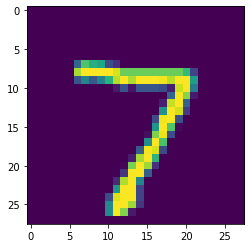


After AutoEncoder 


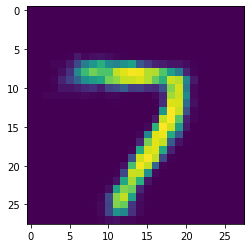

In [17]:
n = 0
print('Orignal Image')
plt.imshow(X_test[n])
plt.show()
print('\nAfter AutoEncoder ')
plt.imshow(passed_image[n])
plt.show()

# AutoEncoders for Denoising Images

In [18]:
from tensorflow.keras.layers import GaussianNoise

sample = GaussianNoise(0.2)


In [22]:
noisy = sample(X_test[:10],training=True)

Orignal Image


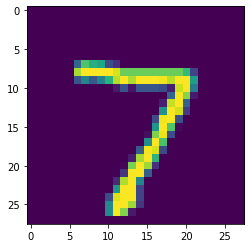


 Noise Version


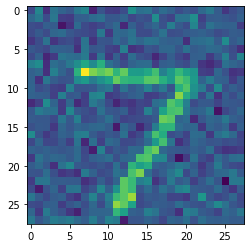

In [23]:
n = 0
print('Orignal Image')
plt.imshow(X_test[n])
plt.show()
print('\n Noise Version')
plt.imshow(noisy[n])
plt.show()

# Create noise removal autoencoder and train it.

In [24]:
import tensorflow as tf

In [26]:
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(units=400,activation='relu'))
encoder.add(Dense(units=200,activation='relu'))
encoder.add(Dense(units=100,activation='relu'))
encoder.add(Dense(units=50,activation='relu'))
encoder.add(Dense(units=25,activation='relu'))


In [27]:
decoder = Sequential()

decoder.add(Dense(units=50,activation='relu',input_shape=[25]))
decoder.add(Dense(units=100,activation='relu'))
decoder.add(Dense(units=200,activation='relu'))
decoder.add(Dense(units=400,activation='relu'))
decoder.add(Dense(units=784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [30]:
noise_remover = Sequential([encoder,decoder])

In [32]:
noise_remover.compile(loss='binary_crossentropy',
                    optimizer='adam',metrics=['accuracy'])

In [33]:
noise_remover.fit(X_train,X_train,epochs=8,validation_data=(X_test,X_test))

Epoch 1/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1702 - accuracy: 0.1812 - val_loss: 0.1350 - val_accuracy: 0.2261
Epoch 2/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1322 - accuracy: 0.2300 - val_loss: 0.1231 - val_accuracy: 0.2434
Epoch 3/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1234 - accuracy: 0.2427 - val_loss: 0.1171 - val_accuracy: 0.2550
Epoch 4/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1176 - accuracy: 0.2523 - val_loss: 0.1115 - val_accuracy: 0.2573
Epoch 5/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1140 - accuracy: 0.2590 - val_loss: 0.1098 - val_accuracy: 0.2563
Epoch 6/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1109 - accuracy: 0.2637 - val_loss: 0.1061 - val_accuracy: 0.2594
Epoch 7/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1086 - accuracy: 0.2676 - val_loss: 0.1044 - val_ac

In [35]:
ten_noisy_image = sample(X_test[:10],training=True)

In [36]:
denoise = noise_remover(ten_noisy_image)

Original Image


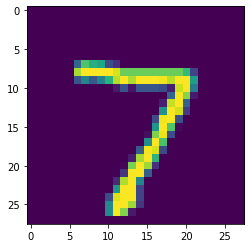


Noise Image


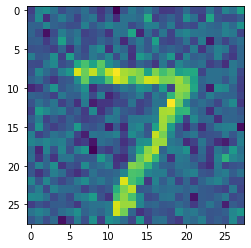


After Noise Removal


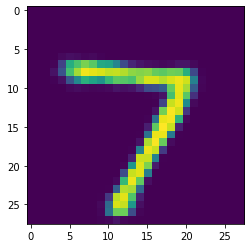

In [39]:
n=0

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('\nNoise Image')
plt.imshow(ten_noisy_image[n])
plt.show()

print('\nAfter Noise Removal')
plt.imshow(denoise[n])
plt.show()